In [48]:
import numpy as np 
from sklearn import datasets 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Linear Support Vector Classification

Options for Linear SVC:
- Use LinearSVC class 
- Use SVC model: SVC(kernel="linear", C=1)
- Use SGDClassifier(loss="hinge", alpha=1/(m*C)
    - Pros: Useful for online classification or large datasets, uses Stoch. Grad. Descent 
    - Cons: Does not converge as fast as LinearSVC class

In [49]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # petal length / width 
y = (iris["target"] == 2).astype(np.float64)
svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("svc", LinearSVC(C=1, loss='hinge'))
])

In [50]:
svm_clf.fit(X,y)
svm_clf.predict([[5.5,1.7]])

array([1.])

### SVM Plots 

#### Large Marin Classification

In [51]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

## SVM Classifier model
svm_clf = SVC(kernel="linear", C=1) #float("inf")) # -> cell runs forever... 
svm_clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

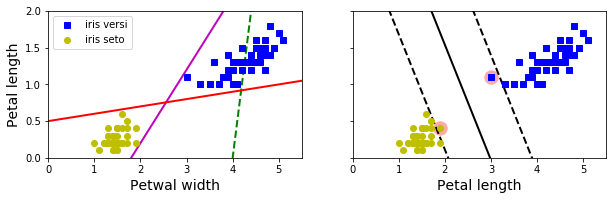

In [52]:
x0 = np.linspace(0,5.5,200)
pred_1 = 5*x0 - 20 
pred_2 = x0 - 1.8 
pred_3 = 0.1 * x0 + 0.5 

## Bad "model"
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)
plt.sca(axes[0]) # Sets the current axes
plt.plot(x0, pred_1, "g--", linewidth = 2)
plt.plot(x0, pred_2, "m-", linewidth = 2)
plt.plot(x0, pred_3, "r-", linewidth = 2)
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="iris versi")
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", label="iris seto")
plt.axis([0,5.5,0,2])
plt.legend(loc="upper left")
plt.xlabel("Petwal width", fontsize=14)
plt.ylabel("Petal length", fontsize=14)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0] # 2d -> returns 2 coefs. (still in list)
    b = svm_clf.intercept_[0] # Only one intercept but in list 
    
    ## x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin,xmax,200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1] 
    gutter_up = decision_boundary + margin 
    gutter_down = decision_boundary - margin 
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:,0], svs[:,1], s=180, facecolor='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-', linewidth=2)
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)
    
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf,0,5.5)
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="iris versi")
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", label="iris seto")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()


### Sensitvity to feature scale

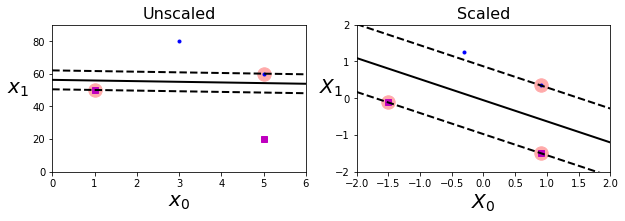

In [53]:
Xs = np.array([[1,50],[3,80], [5,20], [5,60]]).astype(np.float64)
ys = np.array([0,1,0,1])

svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

## Unscaled 
plt.figure(figsize=(10,2.7))
plt.subplot(121)
plt.plot(Xs[:,0][ys==0], Xs[:,1][ys==0], 'ms')
plt.plot(Xs[:,0][ys==1], Xs[:,1][ys==1], 'b.')
plot_svc_decision_boundary(svm_clf, 0,6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

## Scaled 
plt.subplot(122) 
scaler =  StandardScaler()
Xscaled = scaler.fit_transform(Xs)
svm_clf.fit(Xscaled, ys)

plt.plot(Xscaled[:,0][ys==0], Xscaled[:,1][ys==0], 'ms')
plt.plot(Xscaled[:,0][ys==1], Xscaled[:,1][ys==1], 'b.')
plot_svc_decision_boundary(svm_clf,-2,2)
plt.axis([-2,2,-2,2])
plt.xlabel('$X_0$', fontsize=20)
plt.ylabel('$X_1$', fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)

plt.show()


# Nonlinear SVM Classification

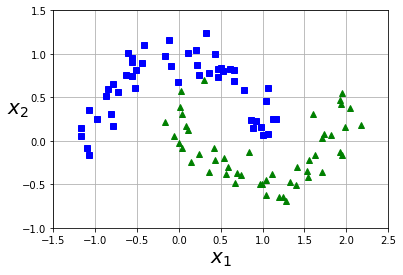

In [54]:
from sklearn.datasets import make_moons 

X,y = make_moons(n_samples=100,noise=.15)

def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'bs')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X,y,[-1.5, 2.5, -1, 1.5])
plt.show()

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()), 
    ("svm_clf", LinearSVC(C=10, loss='hinge'))
])

poly_svm_clf.fit(X,y)

/Users/elieharik/Desktop/Dev/Books/Python/HandsOnML/env/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

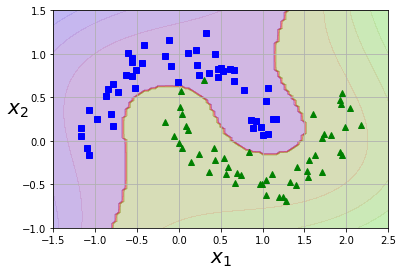

In [56]:
def plot_predictions(clf, axes):
    ## First get evenly spaced number for x,y axis
    ## Meshgrid + ravel 
    ## Get predictions for all values 
    ## From decision get decision function (instead of predict(X) use decision_function(X
    ## plt contour predictions and decision boundary 
    x0s = np.linspace(axes[0],axes[1], 100)
    x1s = np.linspace(axes[2],axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred, cmap=plt.cm.brg,alpha=.2)
    plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg, alpha=.1)
    #     print(x0.shape, x1.shape)
    
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()   